# 1 - Regression Model

## 1.2 Loading Data
[JSON Viewer](http://jsonviewer.stack.hu)

[Pandas: read_json](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html?highlight=read_json#pandas.read_json)


In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = 'data/imoveis.json'
df = pd.read_json(file_path, orient='columns')

df

,ident,listing
0,"{'customerID': '775564-BOJSMVON', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
1,"{'customerID': '660895-AUENKNYY', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
2,"{'customerID': '751522-JESYFEQL', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
3,"{'customerID': '714052-GAAEWYKS', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Comerci..."
4,"{'customerID': '568886-ZIBFOMCC', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
...,...,...
73610,"{'customerID': '134148-MJIBCMDQ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73611,"{'customerID': '541465-QBQVXXXZ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73612,"{'customerID': '800542-BZREFTQS', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
73613,"{'customerID': '939419-ECGUNTIH', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."


## 1.3 Initial data processing

### Normalization

In [3]:
df1 = pd.json_normalize(df.ident)
df1.head()

,customerID,source
0,775564-BOJSMVON,Website
1,660895-AUENKNYY,Website
2,751522-JESYFEQL,Website
3,714052-GAAEWYKS,Website
4,568886-ZIBFOMCC,Website


In [4]:
df2 = pd.json_normalize(df.listing, sep='_')
df2.head()

,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,0,0,0,1,62,62,0,0,0
1,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,2,1,0,1,44,0,0,0,0
2,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,0,100,0,0,0,0,132,132,0,0,0
3,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,346,468,0,1,0,0,32,32,0,0,3
4,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,120,400,3,2,1,1,60,0,3,4,2


### Joining dataframes

In [5]:
data_prop = pd.concat([df1, df2], axis=1)
data_prop.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
3,714052-GAAEWYKS,Website,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,...,468,0,1,0,0,32,32,0,0,3
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2


In [6]:
data_prop.shape

(73615, 21)

In [7]:
for column in data_prop.columns:
    print('========'*30)
    print(data_prop[column].value_counts())

customerID
775564-BOJSMVON    1
917809-TRNXMOHE    1
125760-XEXDELYV    1
294183-VCUBOXCU    1
465524-CFDRZTHS    1
                  ..
200525-LDRZXCVM    1
938284-QWFBFUXB    1
882696-YVZSJYMI    1
566032-WFPGBXHL    1
610503-VULDJJZZ    1
Name: count, Length: 73615, dtype: int64
source
Website    73615
Name: count, dtype: int64
types_unit
Apartamento    59106
Casa            9389
Outros          5120
Name: count, dtype: int64
types_usage
Residencial    69596
Comercial       4019
Name: count, dtype: int64
address_city
Rio de Janeiro        73607
Queimados                 3
São Gonçalo               2
Cachoeirinha              1
São João de Meriti        1
Armação dos Búzios        1
Name: count, dtype: int64
address_location_lon
-43.365895    399
-43.462590    278
-43.333066    236
-43.383834    232
-43.516473    218
             ... 
-43.231882      1
-43.236952      1
-43.240152      1
-43.185712      1
-43.250934      1
Name: count, Length: 25753, dtype: int64
address_location_lat

## 1.4 Cleaning

### Filter

In [8]:
filter = (data_prop['types_usage'] == 'Residencial') & (data_prop['address_city'] ==  'Rio de Janeiro')

#aplicando o filtro 
data_prop = data_prop[filter]
data_prop.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2
5,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000,...,0,0,0,0,0,200,200,0,0,0


### Variable types

In [9]:
data_prop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69588 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  object 
 10  prices_tax_iptu           60863 non-null  object 
 11  prices_tax_condo          63527 non-null  object 
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  features_su

exit `.info`

> 69588 entries, 0 to 73614

We realize that we have to resent the index, so that the information is ordered correctly.
 

In [10]:
data_prop.reset_index(drop=True, inplace=True)

In [11]:
data_prop.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Columns: 21 entries, customerID to features_unitFloor
dtypes: float64(2), int64(7), object(12)
memory usage: 11.1+ MB


Now it is correct.

In [12]:
data_prop = data_prop.astype({
    'prices_price': 'float64',
    'prices_tax_iptu': 'float64',
    'prices_tax_condo':'float64',
    'features_usableAreas':'int64',
    'features_totalAreas':'int64',
    
})
data_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  float64
 10  prices_tax_iptu           60863 non-null  float64
 11  prices_tax_condo          63527 non-null  float64
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

## 1.5 - Final data processing

### Dealing with null data

#### Data null zone

In [13]:
data_prop.address_zone.value_counts()

address_zone
Zona Oeste      35523
Zona Sul        18535
Zona Norte      14379
Zona Central     1002
                  149
Name: count, dtype: int64

In [14]:
data_prop['address_zone'] = data_prop['address_zone'].replace('', np.nan)

In [15]:
data_prop.address_zone.isnull().sum()

149

In [16]:
dici = data_prop[~data_prop['address_zone'].isna()].drop_duplicates(subset=['address_neighborhood']).to_dict('records')
print(dici)

[{'customerID': '775564-BOJSMVON', 'source': 'Website', 'types_unit': 'Outros', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.413557, 'address_location_lat': -22.909429, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Taquara', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 150.0, 'features_bedrooms': 0, 'features_bathrooms': 0, 'features_suites': 0, 'features_parkingSpaces': 1, 'features_usableAreas': 62, 'features_totalAreas': 62, 'features_floors': 0, 'features_unitsOnTheFloor': 0, 'features_unitFloor': 0}, {'customerID': '660895-AUENKNYY', 'source': 'Website', 'types_unit': 'Apartamento', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.509141, 'address_location_lat': -22.869698, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Santíssimo', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 120.0, 'features_bedrooms': 2, 'features_bathrooms':

In [17]:
dict_zones = {dic['address_neighborhood']: dic['address_zone'] for dic in dici}
print(dict_zones)

{'Taquara': 'Zona Oeste', 'Santíssimo': 'Zona Oeste', 'Pedra de Guaratiba': 'Zona Oeste', 'Recreio dos Bandeirantes': 'Zona Oeste', 'Guaratiba': 'Zona Oeste', 'Jacarezinho': 'Zona Norte', 'Santa Cruz': 'Zona Oeste', 'Vargem Grande': 'Zona Oeste', 'Bangu': 'Zona Oeste', 'Tanque': 'Zona Oeste', 'Santo Cristo': 'Zona Central', 'Coelho Neto': 'Zona Norte', 'Bento Ribeiro': 'Zona Norte', 'Campo Grande': 'Zona Oeste', 'Oswaldo Cruz': 'Zona Norte', 'Camorim': 'Zona Oeste', 'Sepetiba': 'Zona Oeste', 'Vigário Geral': 'Zona Norte', 'Campinho': 'Zona Norte', 'Realengo': 'Zona Oeste', 'Jacarepaguá': 'Zona Oeste', 'Cidade de Deus': 'Zona Oeste', 'Honório Gurgel': 'Zona Norte', 'Centro': 'Zona Central', 'Cosmos': 'Zona Oeste', 'Tomás Coelho': 'Zona Norte', 'Cascadura': 'Zona Norte', 'Pavuna': 'Zona Norte', 'Paciência': 'Zona Oeste', 'Praça Seca': 'Zona Oeste', 'Vila Valqueire': 'Zona Oeste', 'Inhoaíba': 'Zona Oeste', 'Vicente de Carvalho': 'Zona Norte', 'Senador Vasconcelos': 'Zona Oeste', 'Turiaçu'

In [18]:
for neighborhood,zone in dict_zones.items(): data_prop.loc[data_prop['address_neighborhood'] == neighborhood, 'address_zone' ] = zone 

In [19]:
data_prop['address_zone'].isnull().sum()

0

#### Dados nulos prices

In [20]:
data_prop.prices_tax_iptu.isnull().sum()
data_prop.prices_tax_condo.isnull().sum()

6061

In [21]:
data_prop.prices_tax_iptu.fillna(0, inplace=True)
data_prop.prices_tax_condo.fillna(0, inplace=True)


### Change column names and variable selection

In [22]:
data_prop.drop(['customerID', 'source', 'types_usage', 'address_city', 
                    'address_location_lon', 'address_location_lat','address_neighborhood' ], axis = 1, inplace=True)

In [23]:
dict_columns = {'types_unit':'unit','address_zone': 'zone', 'prices_price': 'price',
                     'prices_tax_condo': 'tax_condo', 'prices_tax_iptu': 'tax_iptu', 'features_bedrooms': 'bedrooms',
                      'features_bathrooms': 'bathrooms', 'features_suites': 'suites', 'features_parkingSpaces': 'parkingSpaces',
                      'features_usableAreas': 'usableAreas', 'features_totalAreas':'totalAreas', 'features_floors':'floors',
                      'features_unitsOnTheFloor':'unitsOnTheFloor', 'features_unitFloor':'unitFloor'}

data_prop = data_prop.rename(dict_columns, axis = 1)
data_prop.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,45000.0,0.0,150.0,0,0,0,1,62,62,0,0,0
1,Apartamento,Zona Oeste,45000.0,0.0,120.0,2,1,0,1,44,0,0,0,0
2,Outros,Zona Oeste,50000.0,0.0,100.0,0,0,0,0,132,132,0,0,0
3,Apartamento,Zona Oeste,50000.0,120.0,400.0,3,2,1,1,60,0,3,4,2
4,Outros,Zona Oeste,50000.0,0.0,0.0,0,0,0,0,200,200,0,0,0


# 2 - Linear Regression

## 2.1 - Correlation


* Correlation: degree of relationship between variables. This relationship can be positive or negative.

* Multicollinearity: perfect or exact relationship between variables.


In [25]:
correlation = data_prop.corr(numeric_only=True)

 [Docs Seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

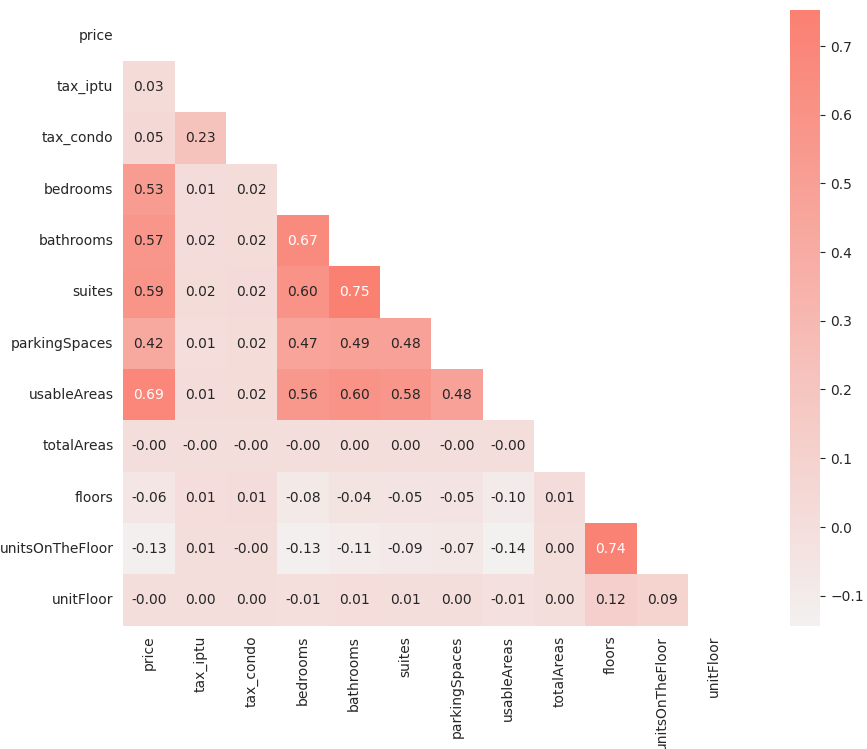

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
cores = sns.color_palette('light:salmon', as_cmap=True)
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlation, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)

Análise da distribuição da variável resposta.

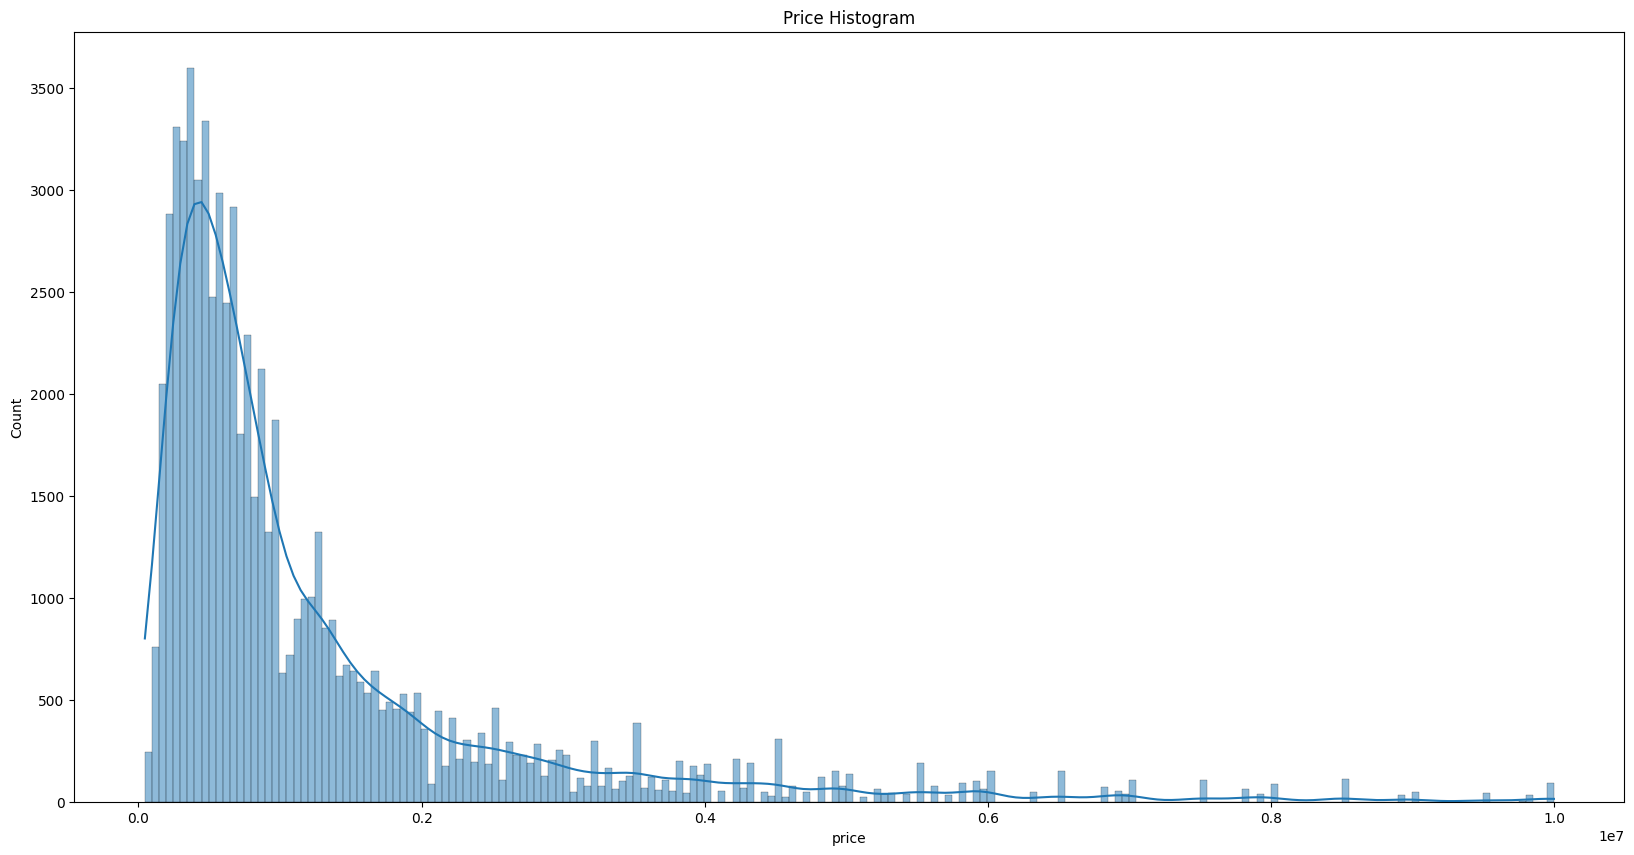

In [27]:
ax = sns.histplot(data=data_prop, x='price', kde=True)
ax.figure.set_size_inches(20,10)
ax.set_title('Price Histogram')
ax.set_label('Price')

### Variable transformation


We are performing a logarithmic transformation of the variables to obtain a symmetric distribution (closer to normal), so that we can use the linear regression model. The transformation performed is:

$$log1p = log(1+x)$$


Remember to perform the inverse transformation to obtain the original value:

$$expm1 = exp(x) - 1$$ 


 [`log1p`](https://numpy.org/doc/stable/reference/generated/numpy.log1p.html), [`expm1`](https://numpy.org/doc/stable/reference/generated/numpy.expm1.html#numpy.expm1) and [`FunctionTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html#sklearn.preprocessing.FunctionTransformer)



In [35]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True)

data_numeric = data_prop.select_dtypes(exclude=['object'])
data_transformed = transformer.transform(data_numeric)

columns_transformed_data = data_numeric.columns
df_transformed_numeric = pd.DataFrame(data_transformed, columns=columns_transformed_data)

data_non_numeric = data_prop.select_dtypes(include=['object'])

df_transformed = pd.concat([data_non_numeric, df_transformed_numeric], axis=1)
df_transformed

C:\Users\camila-paula\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000
1,Apartamento,Zona Oeste,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000
2,Outros,Zona Oeste,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000
3,Apartamento,Zona Oeste,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612
4,Outros,Zona Oeste,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69583,Casa,Zona Oeste,16.118096,7.972811,7.762596,1.791759,2.397895,0.693147,1.609438,6.932448,6.932448,0.000000,0.000000,0.000000
69584,Casa,Zona Oeste,16.118096,9.615872,8.006701,1.791759,2.079442,1.791759,1.945910,6.621406,7.131699,0.000000,0.000000,0.000000
69585,Apartamento,Zona Sul,16.118096,0.000000,0.000000,1.609438,1.791759,1.609438,1.386294,5.796058,5.796058,0.000000,0.000000,0.000000
69586,Casa,Zona Oeste,16.118096,10.463132,7.783641,1.791759,2.397895,1.791759,1.609438,6.932448,6.932448,0.000000,0.000000,1.386294


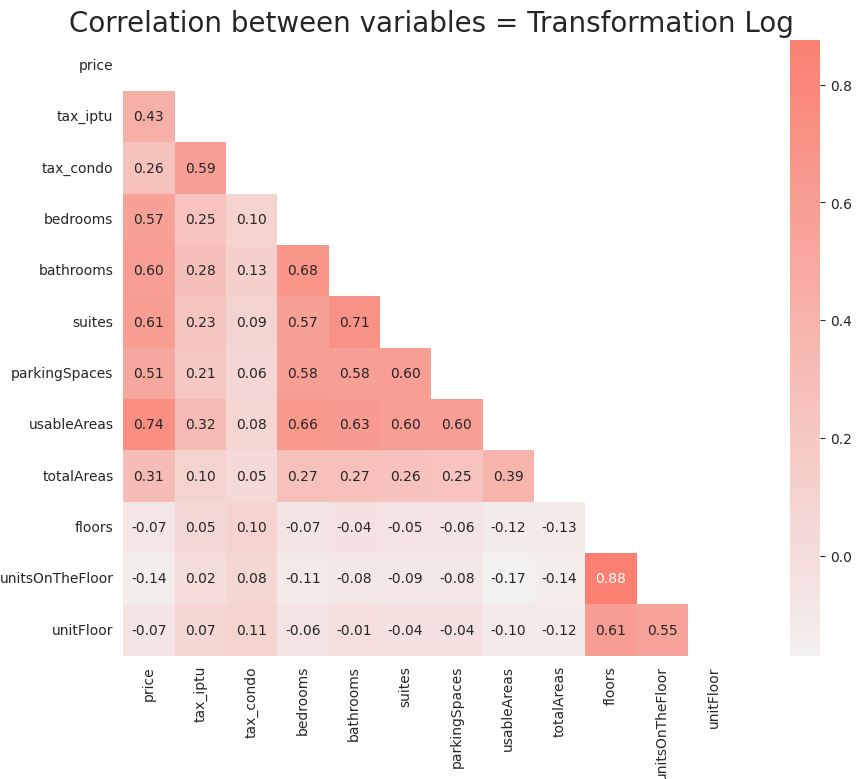

In [38]:
correlation_transformed = df_transformed.corr(numeric_only=True)
mask = np.zeros_like(correlation_transformed)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlation_transformed, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)
    ax.set_title('Correlation between variables = Transformation Log', fontsize=20)

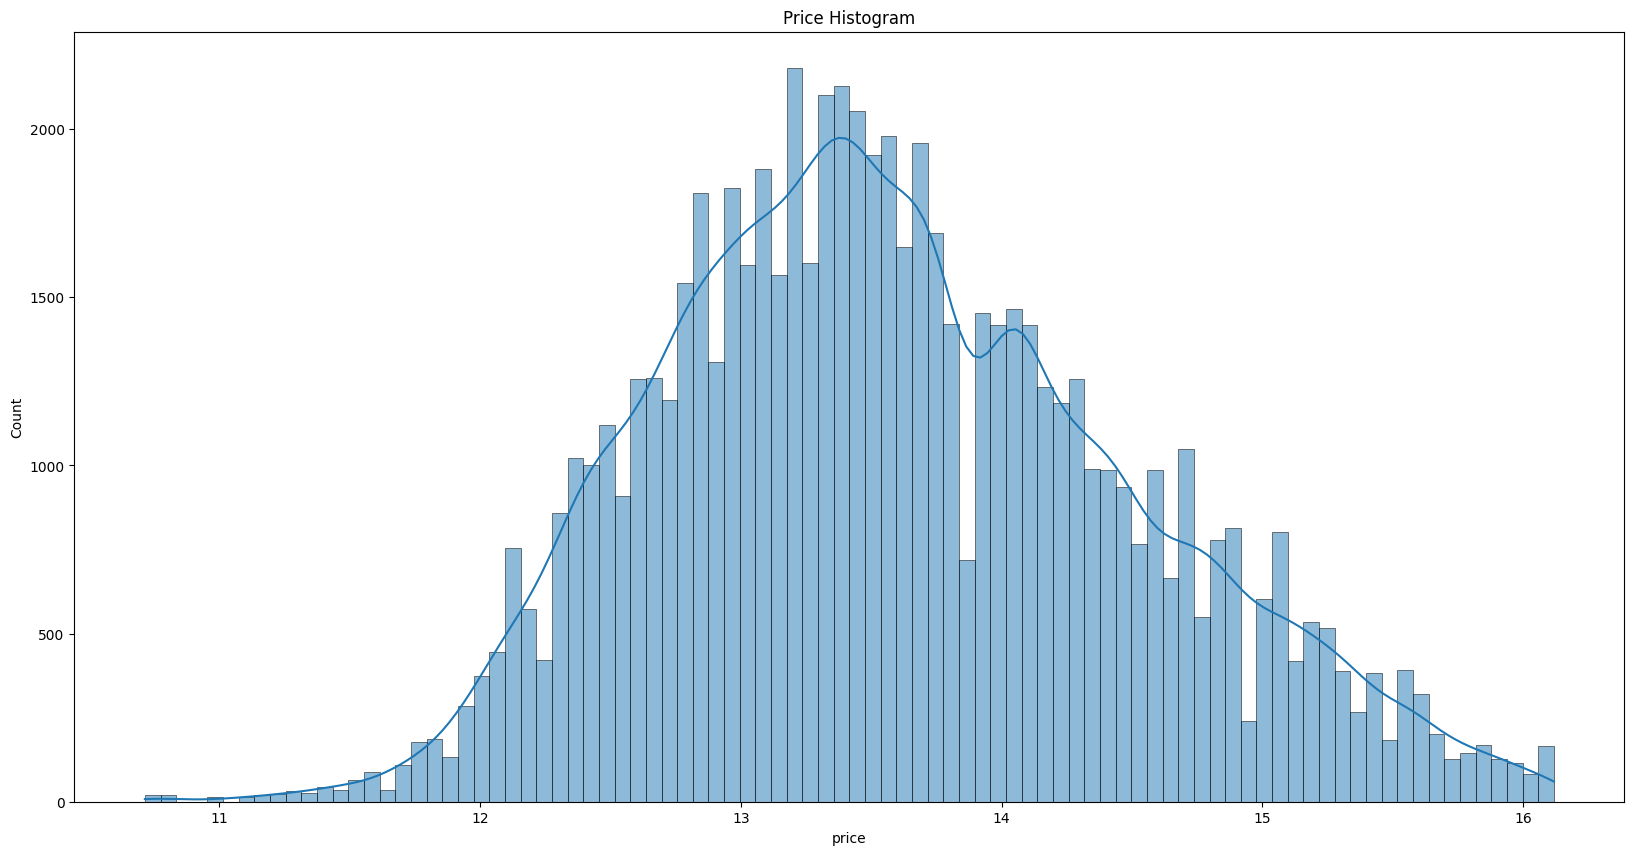

In [39]:
ax = sns.histplot(data=df_transformed, x='price', kde=True)
ax.figure.set_size_inches(20,10)
ax.set_title('Price Histogram')
ax.set_label('Price')

### Dummies

In [40]:
categoric_variables = df_transformed.select_dtypes(include=['object']).columns

In [41]:
categoric_variables

Index(['unit', 'zone'], dtype='object')

In [42]:
df_dummies = pd.get_dummies(df_transformed[categoric_variables])
df_dummies.head()

,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,False,False,True,False,False,True,False
1,True,False,False,False,False,True,False
2,False,False,True,False,False,True,False
3,True,False,False,False,False,True,False
4,False,False,True,False,False,True,False


In [43]:
data_prop_dummies = pd.concat([df_transformed.drop(categoric_variables,axis=1), df_dummies],axis=1)
data_prop_dummies.head()

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000,False,False,True,False,False,True,False
1,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000,True,False,False,False,False,True,False
2,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000,False,False,True,False,False,True,False
3,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612,True,False,False,False,False,True,False
4,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000,False,False,True,False,False,True,False


## 2.2 - Linear Regression

* "Regression analysis concerns the study of the dependence of a variable, the dependent variable, in relation to one or more variables, the explanatory variables, aiming to estimate and/or predict the average value (of the population) of the first in terms of the known or fixed values ​​(in repeated sampling) of the second."

* [Docs Sklearn - LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) 

* Simple Regression: the dependent variable (regressor or `y`) is related to a single explanatory variable (regressor or `X`).

* Multiple Regression: the dependent variable (regressor or `y`) relates to more than a single explanatory variable (regressor or `Xi`).


[slides]

## 2.3 - Adjustment and Prediction

### Splitting the data

In [45]:
X = data_prop_dummies.drop('price', axis=1)
y = data_prop_dummies['price']

In [44]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

### Model

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
predict_lr = lr.predict(X_test)

In [51]:
predict_lr

array([13.25768024, 12.45705313, 12.91487963, ..., 13.13161073,
       12.42379775, 14.49548233])

In [52]:
np.expm1(13.25768024)

572448.7513552749

## 2.4 - Performance Metric

### Determination coefficient

* find out how “well” a sample regression line fits the data
* r2 is between 0 and 1
* "r2 measures the proportion or percentage of the total variation in Y explained by the regression model."

In [57]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

In [55]:
r2_lr = r2_score(y_test, predict_lr)
r2_lr

0.7880682093407632

In [58]:
mse_lr = mean_squared_error(y_test, predict_lr)
mse_lr

0.17351220044092464

In [59]:
mape_lr = mean_absolute_percentage_error(y_test, predict_lr)
mape_lr

0.022975801844755322

### Extra

* [Sklearn Documentation - Metrics for Regression](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

* Note: These metrics depend on the scale of the data.

* MSE (Mean Squared Error): average of the difference **squared** between the actual value and the predicted value. *(penalty for error)*

* MAE (Mean Absolute Error): average of the **absolute** difference (module) between the actual value and the predicted value.

# 3 - Decision Tree for Regression






## 3.1 - Decision Tree Classification versus Regression

[slides]

[Sklearn - Desicion Tree](https://scikit-learn.org/stable/modules/tree.html#regression)


## 3.2 - Model


In [60]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
dtr = DecisionTreeRegressor(random_state=42, max_depth=5)

In [63]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [64]:
predict_dtr = dtr.predict(X_test)

In [65]:
predict_dtr

array([13.55136531, 12.33741035, 13.24458243, ..., 13.23643158,
       12.33741035, 14.55274625])

## 3.3 - Metrics

In [67]:
r2_dtr = r2_score(y_test,predict_dtr)
r2_dtr

0.7846916218477392

# Random Forest to Regression


## 4.1 - Modelo Ensemble

[slides]

[Sklearn - Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
[Random Forests](https://link.springer.com/article/10.1023/A:1010933404324), [Random Forests](https://en.wikipedia.org/wiki/Random_forest#:~:text=Random%20forests%20or%20random%20decision,class%20selected%20by%20most%20trees.), [Capítulo 4 - Livro Introduction to Statistical and Machine Learning Methods for Data Science](https://www.amazon.com.br/dp/B09C2DVZHR/ref=dp-kindle-redirect?_encoding=UTF8&btkr=1), [Capítulo 7 - Mãos à obra: aprendizado de máquina com Scikit-Learn, Keras & TensorFlow: Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes](https://www.amazon.com.br/M%C3%A3os-obra-aprendizado-Scikit-Learn-inteligentes/dp/8550815489/ref=sr_1_2?keywords=machine+learning&qid=1658181249&sprefix=machine%2Caps%2C469&sr=8-2&ufe=app_do%3Aamzn1.fos.6d798eae-cadf-45de-946a-f477d47705b9) 

## 4.2 - Forecast

**Attention point**
The parameters are practically the same between `DecisionTreeRegressor()` and `RandomForestRegressor()`, with the exception of:

* `n_estimators`: number of trees in the forest
* `bootstrap`: defines whether the *bootstrap* statistical sampling method will be used
* `oob_score`: defines whether the *out-of-bag* sampling method will be used to measure prediction errors
* `n_jobs`: number of *jobs* running in parallel (parallel computing - processors)
* `warm_start`: warms up a new forest or uses an existing forest.
* `max_samples`: in case `bootstrap` is `True`, defines the number of samples to be extracted from X to train each base tree.

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
rf = RandomForestRegressor(random_state=42, max_depth=5, n_estimators=10)

In [72]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [75]:
predict_rf = rf.predict(X_test)
predict_rf

array([13.53707348, 12.34106458, 13.15366323, ..., 13.23975692,
       12.34106458, 14.6148927 ])

## 4.3 -Performance Metrics

In [88]:
r2_rf = r2_score(y_test, predict_rf)
r2_rf

0.805273364453047

In [89]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def get_metric(model, X_test, y_test, nome):
    predict = model.predict(X_test)
    df_metrics = pd.DataFrame({
        'R2': [r2_score(y_test,predict)],
        'MSE': [mean_squared_error(y_test, predict)],
        'MAE': [mean_absolute_error(y_test, predict)]
    }, index=[nome])

    return df_metrics

In [90]:
def table_metrics(model_reg_linear, model_dt, model_rf, X_test, y_test):
    df_metrics_lr = get_metric(model_reg_linear, X_test, y_test, 'Linear Regression')
    df_metrics_dt = get_metric(model_dt, X_test, y_test, 'Decision Tree Regression')
    df_metrics_rf = get_metric(model_rf, X_test, y_test, 'Random Forest Regression')

    return pd.concat([df_metrics_lr, df_metrics_dt, df_metrics_rf])


In [91]:
table_metrics(lr, dtr, rf, X_test, y_test)

,R2,MSE,MAE
Linear Regression,0.788068,0.173512,0.312049
Decision Tree Regression,0.784692,0.176277,0.312601
Random Forest Regression,0.805273,0.159426,0.298641


# 5 - Optimization Techniques

## 5.1 - Optimization Techniques



[Docs Sklearn](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)

### 1. Cross Validation
* [Docs Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)

### 2. Randomized Parameter Optimization 

* [Docs Randomized Search](https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-optimization)

* [Random Search](https://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf)




## 5.2 - Optimize a Decision Tree

In [103]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=True)

### Cross validation


In [104]:
from sklearn.model_selection import cross_val_score
perf_cross_val_r2 = cross_val_score(estimator=dtr,X = X_train, y = y_train, scoring='r2',cv=cv)
print('Average performance r2: {}'.format(round(perf_cross_val_r2.mean(),3)))

Average performance r2: 0.783


In [105]:
param_random_dt = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth':[6,8,10,12,14,16],
    'min_samples_leaf':[6,8,10],
    'min_samples_split':[8,10,12,14,16],
    'max_features':['sqrt','log2','auto'],
}

### Random Search Validation

In [94]:
from sklearn.model_selection import RandomizedSearchCV

In [99]:
random_cv_dt = RandomizedSearchCV(dtr, param_random_dt, n_iter=5,cv=cv,scoring='r2',n_jobs=-1)

In [100]:
randomcv_dtr = random_cv_dt.fit(X_train,y_train)

C:\Users\camila-paula\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\camila-paula\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\camila-paula\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\camila-paula\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 637, in _v

In [101]:
pd.DataFrame(randomcv_dtr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.080014,0.005854,0.005799,0.001169,8,8,sqrt,10,squared_error,"{'min_samples_split': 8, 'min_samples_leaf': 8...",0.821627,0.832152,0.817793,0.823196,0.825311,0.824016,0.004754,2
1,0.077708,0.007628,0.005315,0.001594,8,8,log2,12,squared_error,"{'min_samples_split': 8, 'min_samples_leaf': 8...",0.835240,0.839305,0.837524,0.835839,0.844234,0.838429,0.003230,1
2,21.643012,0.523360,0.002798,0.000401,12,8,log2,8,absolute_error,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.802941,0.793065,0.782221,0.783176,0.765887,0.785458,0.012347,4
3,0.007099,0.000662,0.000000,0.000000,16,10,auto,12,squared_error,"{'min_samples_split': 16, 'min_samples_leaf': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4,0.049941,0.003530,0.003913,0.001370,8,10,log2,10,squared_error,"{'min_samples_split': 8, 'min_samples_leaf': 1...",0.817192,0.820406,0.819228,0.820306,0.824780,0.820382,0.002484,3


In [102]:
randomcv_dtr.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 8,
 'max_features': 'log2',
 'max_depth': 12,
 'criterion': 'squared_error'}

In [107]:
randomcv_dtr.best_score_

0.8384285171742085

### Random Search Test

In [111]:
dtr_opt = DecisionTreeRegressor(criterion='squared_error',max_depth=12, max_features='log2',min_samples_leaf=8, min_samples_split=8)

In [112]:
dtr_opt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=12, max_features='log2', min_samples_leaf=8,
                      min_samples_split=8)

In [113]:
predict_dtr_opt = dtr_opt.predict(X_test)

In [114]:
r2_score(y_test,predict_dtr_opt)

0.8365459780507996

## 5.3  - Optmize Random Forest

### Cross validation

In [115]:
perfRF_cross_val_r2 = cross_val_score(estimator=rf,X = X_train, y = y_train, scoring='r2',cv=cv)
print('Average performance r2: {}'.format(round(perfRF_cross_val_r2.mean(),3)))

Average performance r2: 0.798


### Random Search Validation

Definindo os parâmetros

In [116]:
param_random_rf = {'n_estimators':[150,200],
                   'max_depth':[20,30],
                   'min_samples_split':[8,10],
                   'min_samples_leaf':[3],                    
                   }

In [117]:
random_cv_rf = RandomizedSearchCV(
    rf,
    param_random_rf,
    n_iter=5,
    cv=cv,
    scoring='r2',
    n_jobs=1,
    random_state=42
)

In [118]:
rf_randomcv = random_cv_rf.fit(X_train, y_train)

In [120]:
pd.DataFrame(rf_randomcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,39.519223,0.579871,0.316299,0.005068,200,8,3,20,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.897043,0.896562,0.897625,0.890525,0.891892,0.894729,0.002927,2
1,38.697211,0.127172,0.317605,0.003825,200,8,3,30,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.897101,0.896573,0.897671,0.890602,0.891852,0.894760,0.002932,1
2,28.676395,0.368310,0.234404,0.006650,150,8,3,20,"{'n_estimators': 150, 'min_samples_split': 8, ...",0.896954,0.896490,0.897679,0.890253,0.891860,0.894647,0.002999,3
3,38.089217,0.477313,0.317811,0.018207,200,10,3,30,"{'n_estimators': 200, 'min_samples_split': 10,...",0.896844,0.896373,0.897302,0.890339,0.891466,0.894465,0.002945,4
4,28.477110,0.128155,0.228798,0.005412,150,10,3,20,"{'n_estimators': 150, 'min_samples_split': 10,...",0.896710,0.896203,0.897326,0.890065,0.891457,0.894352,0.002986,5


In [121]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 30}

In [122]:
rf_randomcv.best_score_

0.8947597522603858

### Random Search Test

In [123]:
rf_opt = RandomForestRegressor(random_state=42, max_depth=30, n_estimators=200, min_samples_leaf=3, min_samples_split=8)

In [124]:
rf_opt.fit(X_train,y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=200, random_state=42)

In [125]:
predict_rf_opt = rf_opt.predict(X_test)

In [126]:
r2_score(y_test, predict_rf_opt)

0.8950454342187095

## 5.4 -Selecting best model

In [131]:
print('Random Search')
print('='*30)
print('Decision Tree: %f' % r2_score(y_test, predict_dtr_opt))
print('Random Forest: %f' % r2_score(y_test, predict_rf_opt))
print('='*30)
print('Cross Validation')
print('='*30)
print('Decision Tree: %f' % round(perf_cross_val_r2.mean(),3))
print('Random Forest: %f' % round(perfRF_cross_val_r2.mean(),3))


Random Search
Decision Tree: 0.836546
Random Forest: 0.895045
Cross Validation
Decision Tree: 0.783000
Random Forest: 0.798000
